In [47]:
import yfinance as yf

def fetch_stock_price(stock_symbol, start_date, end_date):
    # 使用 yf.Ticker() 建立 Ticker 對象
    stock = yf.Ticker(stock_symbol)

    # 使用 history() 方法取得歷史價格資訊
    stock_data = stock.history(start=start_date, end=end_date)

    return stock_data

# 股票代碼：2330 台積電
stock_symbol = '2330.TW'

# 起始日期和結束日期
start_date = '2022-01-01'
end_date = '2023-12-31'

# 擷取股票價格資訊
stock_price_data = fetch_stock_price(stock_symbol, start_date, end_date)

# 輸出資訊
stock_price_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00+08:00,593.134488,605.591271,592.176274,604.633057,69089158,0.0,0
2022-01-04 00:00:00+08:00,618.048085,628.588440,617.089871,628.588440,79434666,0.0,0
2022-01-05 00:00:00+08:00,641.045240,641.045240,619.006316,622.839172,69593809,0.0,0
2022-01-06 00:00:00+08:00,611.340499,619.006211,609.424071,617.089783,53210211,0.0,0
2022-01-07 00:00:00+08:00,616.131617,619.006259,605.591262,607.507690,38249908,0.0,0


In [48]:
stock_price_data['dOH'] = stock_price_data['Open']-stock_price_data['High']
stock_price_data['dOL'] = stock_price_data['Open']-stock_price_data['Low']
stock_price_data['dOC'] = stock_price_data['Open']-stock_price_data['Close']
stock_price_data['dHL'] = stock_price_data['High']-stock_price_data['Low']
stock_price_data['dHC'] = stock_price_data['High']-stock_price_data['Close']
stock_price_data['dLC'] = stock_price_data['Low']-stock_price_data['Close']

In [49]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df' and the columns you want to normalize are ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
columns_to_normalize = ['dOH','dOL', 'dOC',	'dHL', 'dHC', 'dLC', 'Volume']
# columns_to_normalize = ['dOH','dOC', 'dLC']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
stock_price_data[columns_to_normalize] = scaler.fit_transform(stock_price_data[columns_to_normalize])

# Print the normalized DataFrame
stock_price_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,dOH,dOL,dOC,dHL,dHC,dLC
Date,,,,,,,,,,,,,
2022-01-03 00:00:00+08:00,593.134488,605.591271,592.176274,604.633057,0.526985,0.0,0,0.418530,0.043478,0.171068,0.512486,4.827783e-02,0.353203
2022-01-04 00:00:00+08:00,618.048085,628.588440,617.089871,628.588440,0.615413,0.0,0,0.507987,0.043478,0.197807,0.427001,5.727899e-15,0.402957
2022-01-05 00:00:00+08:00,641.045240,641.045240,619.006316,622.839172,0.531299,0.0,0,1.000000,1.000000,1.000000,0.897168,9.172788e-01,0.800986
2022-01-06 00:00:00+08:00,611.340499,619.006211,609.424071,617.089783,0.391261,0.0,0,0.642173,0.086957,0.331506,0.341516,9.655565e-02,0.601971
2022-01-07 00:00:00+08:00,616.131617,619.006259,605.591262,607.507690,0.263388,0.0,0,0.865815,0.478261,0.732602,0.512486,5.793339e-01,0.900493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-25 00:00:00+08:00,582.000000,585.000000,580.000000,581.000000,0.018061,0.0,0,0.859963,0.090749,0.519850,0.137124,2.015325e-01,0.948077
2023-12-26 00:00:00+08:00,583.000000,586.000000,582.000000,586.000000,0.074014,0.0,0,0.859963,0.045374,0.408227,0.092517,5.727899e-15,0.792307
2023-12-27 00:00:00+08:00,587.000000,592.000000,586.000000,592.000000,0.221945,0.0,0,0.766605,0.045374,0.352416,0.181730,5.727899e-15,0.688461


c:\Users\user\Anaconda3\envs\sim_search\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


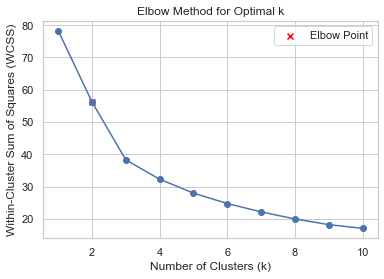

Optimal Number of Clusters (k): 2


In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_for_clustering = stock_price_data[columns_to_normalize]

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-Cluster Sum of Squares

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Automatically identify the elbow point
elbow_point = None
for i in range(1, len(wcss)-1):
    slope = (wcss[i] - wcss[i+1]) / (i - (i+1))
    if slope < 0.1:  # Adjust the threshold based on your data
        elbow_point = i + 1
        break

# Highlight the elbow point
plt.scatter(elbow_point, wcss[elbow_point-1], c='red', marker='x', label='Elbow Point')

plt.legend()
plt.show()

# Print the identified optimal number of clusters
print("Optimal Number of Clusters (k):", elbow_point)

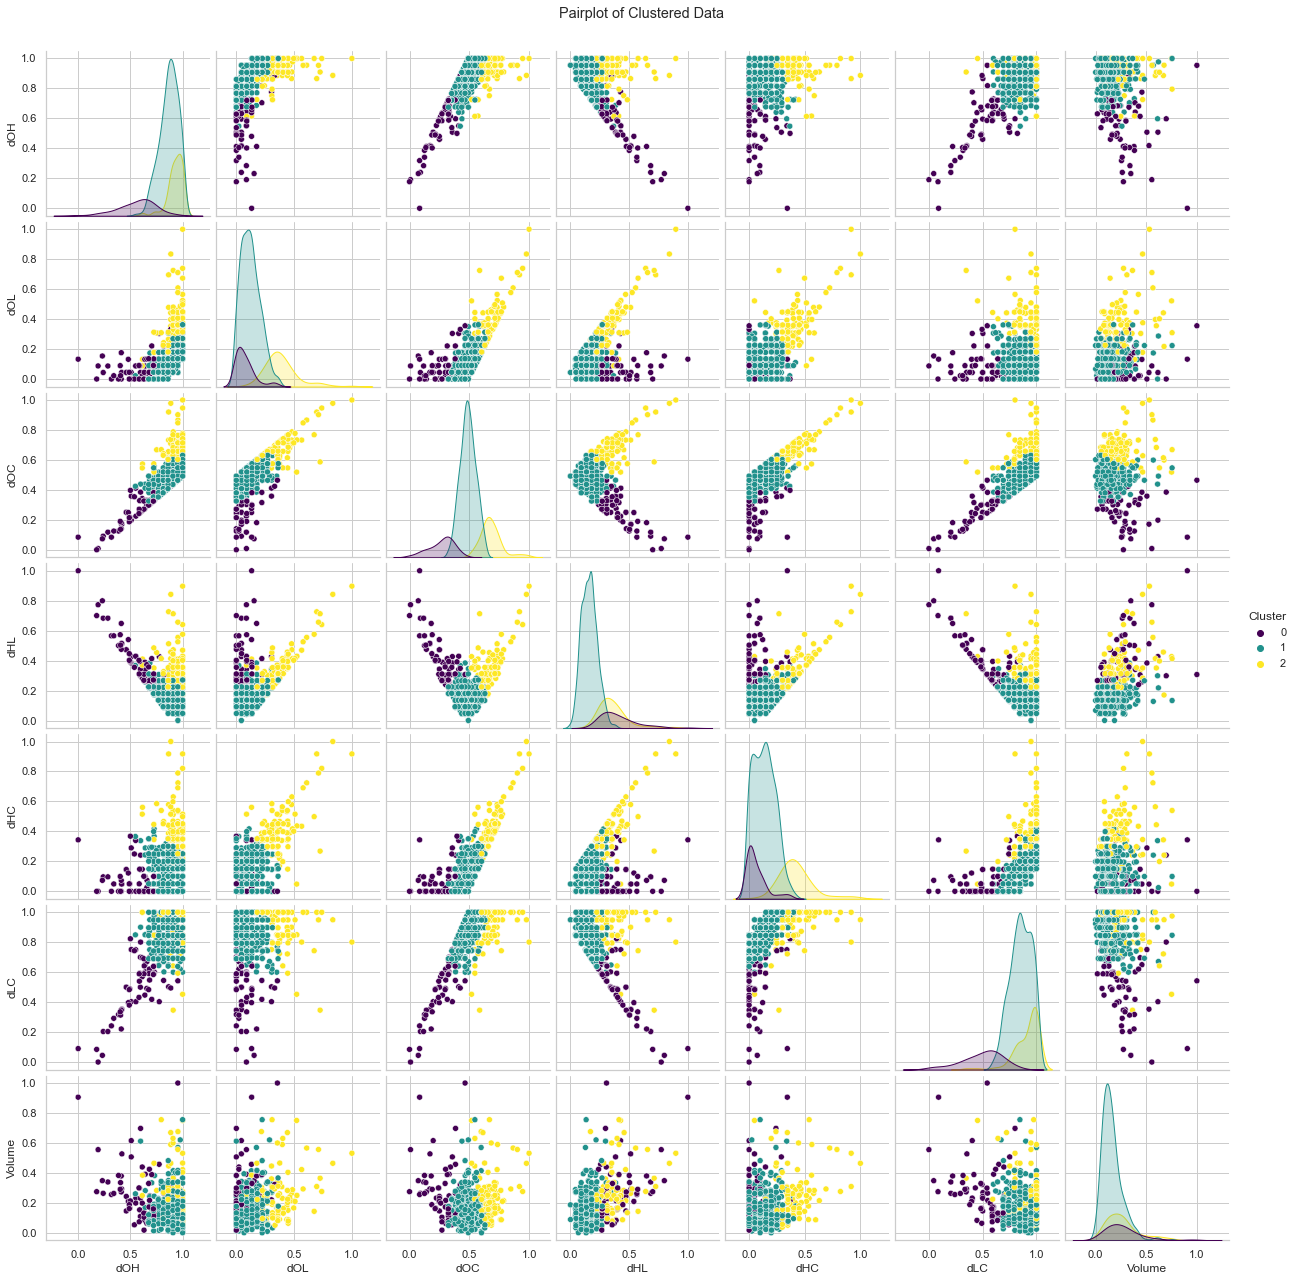

In [51]:
import seaborn as sns
num_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
stock_price_data['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualize the clusters
sns.set(style="whitegrid")
sns.pairplot(stock_price_data, hue="Cluster", palette="viridis", vars=columns_to_normalize)
plt.suptitle("Pairplot of Clustered Data", y=1.02)
plt.show()